In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from tqdm import tqdm
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
import shutil
from pathlib import Path
from pathlib import Path
from sorted_alpha import sorted_alpha

In [112]:
### 
cap = cv2.VideoCapture('/Users/andrei-macpro/Documents/Data/meal_videos/1112_meal_1.mp4')

In [119]:
cap.set(1, 12793)
ret, image = cap.read()

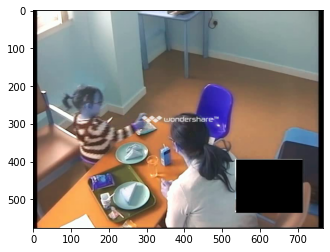

In [120]:
plt.imshow(image)

In [108]:
data = pd.read_csv('/Users/andrei-macpro/Documents/Data/meal_tracking/1043_meal/track1.csv')
data = data.set_index('frame')
data = data.round(0)

In [109]:
data

,x,y
frame,,
1.0,307.0,81.0
2.0,308.0,82.0
3.0,307.0,82.0
4.0,307.0,81.0
5.0,304.0,80.0
...,...,...
24148.0,538.0,144.0
24149.0,538.0,144.0
24150.0,538.0,144.0


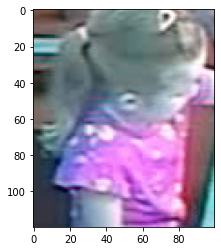

In [21]:
plt.imshow(image[(270-60):(270+60),(230-50):(230+50)])

In [2]:
folders = Path('/Users/andrei-macpro/Documents/Data/play_tracking')
videos = Path('/Users/andrei-macpro/Documents/Data/Play')

In [4]:

for folder, video in zip(sorted_alpha(folders)[69:], sorted_alpha(videos)[69:]):
    cap = cv2.VideoCapture(os.path.join(videos,folder)+'.mp4')
    for track in sorted_alpha(os.path.join(folders, folder)):
        new_path = (os.path.join(folders.parent, 'more_evaluation_tracking_play',folder, track.split('.')[0]))
        os.makedirs(new_path, exist_ok=True)
        data = pd.read_csv(os.path.join(folders, folder, track))
        data = data.round(0)
        data.set_index('frame', inplace=True)
        for index,row in data.sample(n=1000, random_state=42).iterrows():
            cap.set(1, index-1)
            ret,image = cap.read()
            img = image[int(row['y']-50):int(row['y']+60),int(row['x']-50):int(row['x']+50)]
            if img.shape[0]>0 and img.shape[1]>0:
                cv2.imwrite(os.path.join(new_path,str(index)+'.png'), img)
            

In [3]:
sorted_alpha(videos)[69:]

['1245_play.mp4',
 '1246_play.mp4',
 '1246_play_1.mp4',
 '1250_play.mp4',
 '1263_play.mp4',
 '1264_play.mp4',
 '1282_play.mp4',
 '2009_play.mp4',
 '2025_play_1.mp4',
 '2025_play_2.mp4',
 '2027_play.mp4',
 '2027_play_1.mp4']

In [8]:
path = Path('/Users/andrei-macpro/Documents/Data/evaluation_tracking_play')
folders = sorted_alpha(path)

In [11]:
folders.remove('1264_play')

In [17]:
track1 = []
track2 = []
tracks = []
for folder in folders:
    for i,track in enumerate(sorted_alpha(os.path.join(path,folder))):
        if i==0:
            os.chdir(os.path.join(path,folder,track))
            lenghts = [len(os.listdir(os.path.join(Path(x).parent,x))) for x in sorted_alpha(os.path.join(path,folder,track))
                      if x[0]=='c']
            track1.append(max(lenghts))
        elif i==1:
            os.chdir(os.path.join(path,folder,track))
            lenghts = [len(os.listdir(os.path.join(Path(x).parent,x))) for x in sorted_alpha(os.path.join(path,folder,track))
                      if x[0]=='c']
            track2.append(max(lenghts))
            
   

In [13]:
len(track1), len(track2)

(80, 80)

In [19]:
data = pd.DataFrame([folders, track1, track2]).T
data.columns = ['video', 'track1', 'track2']

In [20]:
data[['track1','track2']] = data[['track1','track2']].div(1000)*100
data

,video,track1,track2
0,1043_play,100.0,100.0
1,1043_play_1,100.0,100.0
2,1047_play,100.0,100.0
3,1047_play_1,100.0,100.0
4,1047_play_2,100.0,100.0
5,1049_play,100.0,100.0
6,1053_play,99.2,100.0
7,1053_play_1,99.1,99.2
8,1059_play,100.0,100.0
9,1059_play_1,100.0,100.0


In [22]:
pd.set_option('display.max_rows', data.shape[0]+1)
print(data)

          video track1 track2
0     1043_play  100.0  100.0
1   1043_play_1  100.0  100.0
2     1047_play  100.0  100.0
3   1047_play_1  100.0  100.0
4   1047_play_2  100.0  100.0
5     1049_play  100.0  100.0
6     1053_play   99.2  100.0
7   1053_play_1   99.1   99.2
8     1059_play  100.0  100.0
9   1059_play_1  100.0  100.0
10    1062_play  100.0  100.0
11  1062_play_1  100.0  100.0
12    1069_play  100.0  100.0
13    1073_play  100.0   99.3
14  1073_play_1   99.8  100.0
15    1079_play  100.0  100.0
16    1080_play  100.0   95.1
17    1082_play   99.7   99.8
18    1089_play   99.6   99.3
19    1091_play   91.3    1.0
20    1092_play  100.0  100.0
21  1092_play_1   96.0   98.4
22    1093_play  100.0  100.0
23    1096_play  100.0  100.0
24  1096_play_1   97.8  100.0
25    1097_play  100.0   98.9
26    1098_play  100.0  100.0
27  1098_play_1  100.0  100.0
28    1099_play  100.0  100.0
29    1104_play  100.0  100.0
30  1104_play_1   99.6   99.8
31    1105_play   99.4   99.6
32    1107

In [23]:
data[['track1','track2']].mean()

track1    97.73125
track2    96.33500
dtype: float64

In [21]:
data.at[data.index[39], 'track1'] = 100